### Simple Linear Regression

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv("delivery_time.csv")

In [3]:
df.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


### EDA & Data Visualization

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 468.0 bytes


In [5]:
df.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [6]:
df.shape

(21, 2)

C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


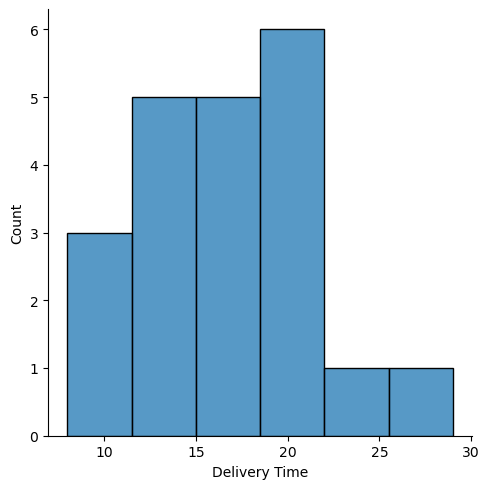

In [7]:
sns.displot(df["Delivery Time"])

C:\Users\DELL\AppData\Local\Temp\ipykernel_24968\1648472574.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Delivery Time"])


<Axes: xlabel='Delivery Time', ylabel='Density'>

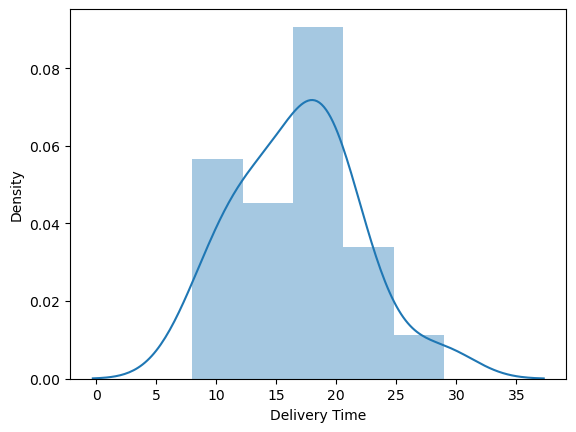

In [8]:
sns.distplot(df["Delivery Time"])

C:\Users\DELL\AppData\Local\Temp\ipykernel_24968\2169179401.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Sorting Time"])


<Axes: xlabel='Sorting Time', ylabel='Density'>

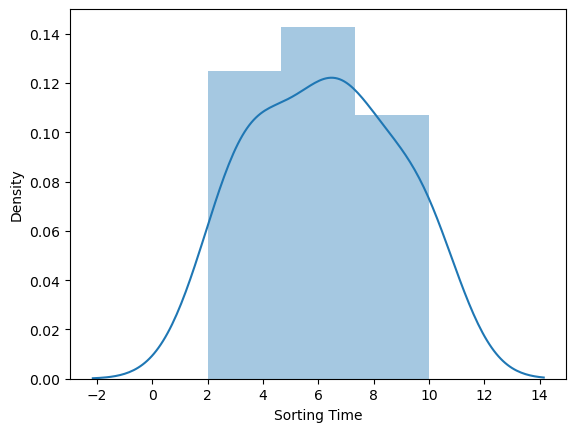

In [9]:
sns.distplot(df["Sorting Time"])

In [10]:
df.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


In [11]:
df = df.rename(columns={'Delivery Time': 'delivery_time', 'Sorting Time': 'sorting_time'})
df

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


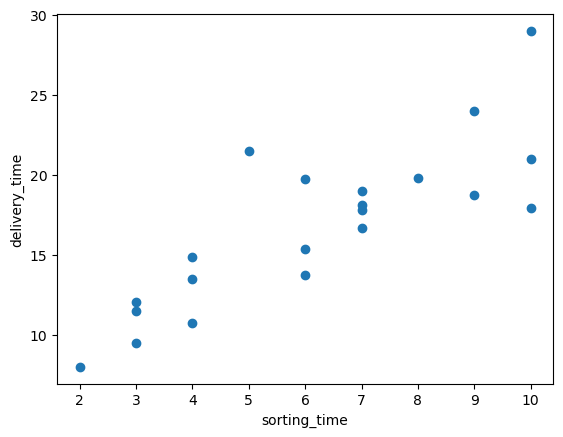

In [12]:
import matplotlib.pyplot as plt
plt.scatter(df["sorting_time"],df["delivery_time"])
plt.xlabel("sorting_time")
plt.ylabel("delivery_time")
plt.show()

<Axes: xlabel='sorting_time', ylabel='delivery_time'>

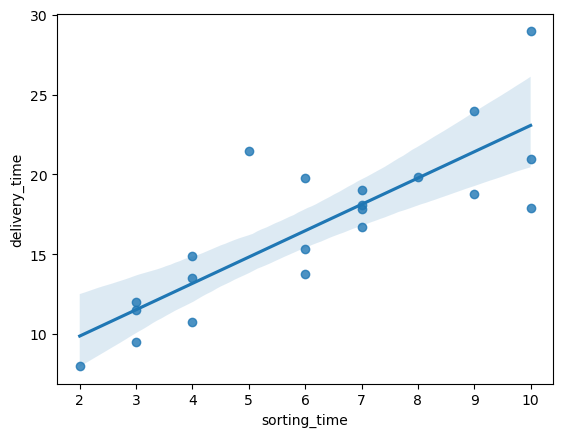

In [13]:
sns.regplot(x=df['sorting_time'],y=df['delivery_time'])

In [14]:
sorting_time = np.array(df[["sorting_time"]])
x = sorting_time
y = df["delivery_time"]
#sorting_time

In [15]:
from sklearn.linear_model import  LinearRegression
LR = LinearRegression()

In [16]:
# Model fitting
LR.fit(x,y)
# Bo
print("Intercept value: ", LR.intercept_)
#B1
print("Codfficient value: ", LR.coef_)

Intercept value:  6.58273397199706
Codfficient value:  [1.6490199]


### Model Prediction

In [17]:
# Manual  Predict if sorting time is 4
delivery_time = (6.582734) + (1.649020)*(4)
delivery_time

13.178814

In [18]:
## Predict if sorting time is 4
delivery_time = LR.predict([[4]])
print(round(delivery_time[0],2))

13.18


In [19]:
## Predict if sorting time is 5
delivery_time= LR.predict([[5]])
print(round(delivery_time[0],2))

14.83


In [20]:
## Predict if sorting time is 8
delivery_time=LR.predict([[8]])
print(round(delivery_time[0],2))

19.77


In [21]:
Y_pred = LR.predict(x)
Y_pred

array([23.07293294, 13.17881356, 16.47685335, 21.42391304, 23.07293294,
       16.47685335, 18.12587325, 11.52979366, 23.07293294, 21.42391304,
       19.77489315, 13.17881356, 18.12587325, 11.52979366, 11.52979366,
       13.17881356, 16.47685335, 18.12587325,  9.88077377, 18.12587325,
       14.82783346])

In [22]:
# Mean Squred Error
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y, Y_pred)
print("Mean squared error:", mse.round(2))

Mean squared error: 7.79


In [23]:
# Root Mean Squared error
import numpy as np
RMSE = np.sqrt(mse)
print("Root Mean Squared error:",RMSE.round(2))

Root Mean Squared error: 2.79


In [24]:
# Define transformational models  log, square, sqrt
transformations = {'log': np.log(x), 'square': x**2, 'sqrt': np.sqrt(x)}
transformations

{'log': array([[2.30258509],
        [1.38629436],
        [1.79175947],
        [2.19722458],
        [2.30258509],
        [1.79175947],
        [1.94591015],
        [1.09861229],
        [2.30258509],
        [2.19722458],
        [2.07944154],
        [1.38629436],
        [1.94591015],
        [1.09861229],
        [1.09861229],
        [1.38629436],
        [1.79175947],
        [1.94591015],
        [0.69314718],
        [1.94591015],
        [1.60943791]]),
 'square': array([[100],
        [ 16],
        [ 36],
        [ 81],
        [100],
        [ 36],
        [ 49],
        [  9],
        [100],
        [ 81],
        [ 64],
        [ 16],
        [ 49],
        [  9],
        [  9],
        [ 16],
        [ 36],
        [ 49],
        [  4],
        [ 49],
        [ 25]], dtype=int64),
 'sqrt': array([[3.16227766],
        [2.        ],
        [2.44948974],
        [3.        ],
        [3.16227766],
        [2.44948974],
        [2.64575131],
        [1.73205081],
     

In [25]:
# Build transformation models and calculate RMSE
for transformation_name, x_transformed in transformations.items():
    # Linear regression model
    model_transformed = LinearRegression()
    model_transformed.fit(x_transformed, y)

    # Make predictions
    predictions_transformed = model_transformed.predict(x_transformed)

    # Calculate RMSE 
    rmse_transformed = np.sqrt(mean_squared_error(y, predictions_transformed))

    print(f'RMSE for {transformation_name} transformation: {rmse_transformed}')

RMSE for log transformation: 2.733171476682066
RMSE for square transformation: 3.011377282646288
RMSE for sqrt transformation: 2.7315432100912105
